#### Graph-based algorithms

Graph-based algorithms can effectively model relationships and dependencies in data, making them particularly useful for problems like association rule mining and recommending frequently bought together (FBT) products. Below, I’ll outline what graph-based algorithms are, provide use cases, generate random data for FBT, implement a graph-based approach for FBT using a standard package, and address optimization and loss functions.

#### What is a Graph-Based Algorithm?
Graph-based algorithms leverage graph structures to represent data, where:

- Nodes (Vertices) represent entities (e.g., products, users).
- Edges represent relationships or connections between nodes (e.g., transactions, co-purchases).

These algorithms can explore connections and patterns in data that might not be immediately evident through traditional methods.

#### Use Cases for Graph-Based Algorithms
- Social Networks: Analyzing relationships between users to recommend friends or content.
- Recommendation Systems: Suggesting products or services based on user interactions or similarities.
- Fraud Detection: Identifying suspicious patterns in transactions.
- Biological Networks: Analyzing interactions between genes or proteins.
- Web Page Ranking: Algorithms like PageRank use graph structures to rank web pages based on their links.
- Solving FBT with Graph-Based Algorithms

In the context of FBT, we can represent products as nodes and edges can represent co-purchase relationships.

#### Generating Random Data for FBT
We can generate a random dataset representing transactions, where each transaction contains a set of purchased items. Below is the code for generating this data:

In [2]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Define the number of transactions and products
num_transactions = 10000  # Total transactions to simulate
num_products = 50  # Total unique grocery items

# List of example products (you can customize this)
product_names = [
    f"Product {i}" for i in range(1, num_products + 1)
]

# Randomly generate transactions
transactions = []
for _ in range(num_transactions):
    # Randomly decide the number of products in this transaction (1 to 5)
    num_items = np.random.randint(1, 5)
    # Randomly sample products without replacement
    items = np.random.choice(product_names, num_items, replace=False)
    transactions.append(items)

# Create a DataFrame for transactions
transactions_df = pd.DataFrame(transactions)

# Show the first few transactions
print(transactions_df.head())


            0           1           2     3
0  Product 44  Product 41  Product 47  None
1  Product 31        None        None  None
2   Product 2  Product 50   Product 6  None
3  Product 49  Product 24  Product 17  None
4  Product 36   Product 7        None  None


In [3]:
transactions[:3]

[array(['Product 44', 'Product 41', 'Product 47'], dtype='<U10'),
 array(['Product 31'], dtype='<U10'),
 array(['Product 2', 'Product 50', 'Product 6'], dtype='<U10')]

#### Implementing Graph-Based FBT Algorithm
We can use the NetworkX library to create a graph and analyze frequent itemsets for the FBT use case. Below is a sample implementation:

In [4]:
from itertools import combinations
for transaction in transactions[:1]:
    for item1, item2 in combinations(transaction, 2):
        print (item1, item2)

Product 44 Product 41
Product 44 Product 47
Product 41 Product 47


In [5]:
import networkx as nx
from itertools import combinations

# Create a graph to represent product co-purchases
G = nx.Graph()

# Add edges based on transactions
for transaction in transactions:
    # Generate all possible pairs of products bought together
    for item1, item2 in combinations(transaction, 2):
        # Add an edge for the co-purchase
        G.add_edge(item1, item2)

# Function to recommend items based on an input item
def recommend_items(item, G, top_n=5):
    """Recommend items based on the input item using the graph."""
    if item not in G:
        return []  # If the item is not in the graph, return an empty list
    
    # Get the neighbors of the input item (items bought together)
    neighbors = list(G.neighbors(item))
    
    # Sort neighbors by degree (number of co-purchases) and select top N
    recommended_items = sorted(neighbors, key=lambda x: G.degree[x], reverse=True)[:top_n]
    return recommended_items

# Example usage: Recommend items for "Product 1"
recommended_for_product_1 = recommend_items("Product 1", G)
print("Recommended items for 'Product 1':", recommended_for_product_1)


Recommended items for 'Product 1': ['Product 28', 'Product 5', 'Product 40', 'Product 46', 'Product 49']


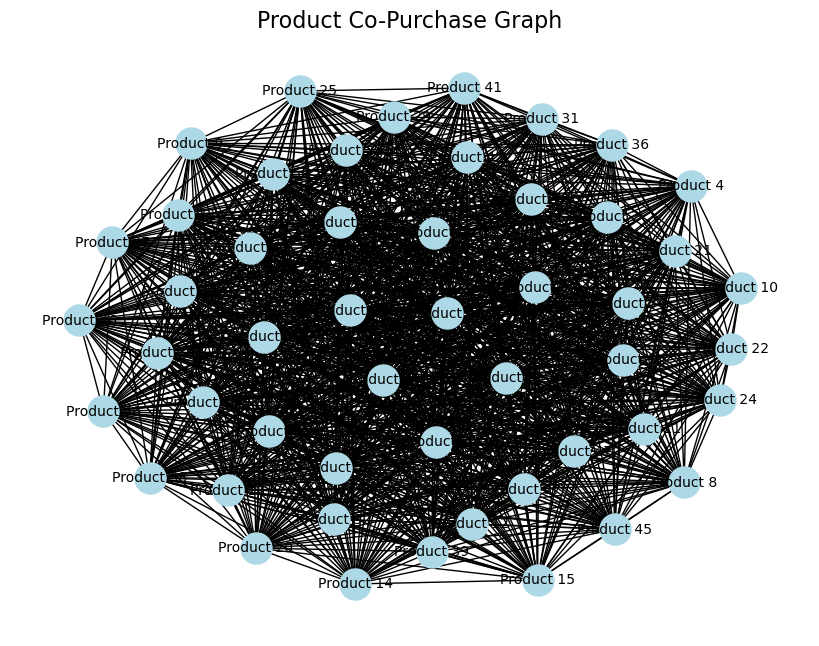

In [6]:
import matplotlib.pyplot as plt

# Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Layout for positioning nodes
nx.draw(
    G, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10, font_color="black"
)
plt.title("Product Co-Purchase Graph", fontsize=16)
plt.show()

In [7]:
import plotly.graph_objects as go

# Get node positions
pos = nx.spring_layout(G)

# Extract node and edge data for visualization
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=1, color="#888"),
    hoverinfo="none",
    mode="lines",
)

node_x = []
node_y = []
node_text = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode="markers+text",
    text=node_text,
    textposition="top center",
    hoverinfo="text",
    marker=dict(
        showscale=True,
        colorscale="YlGnBu",
        size=10,
        line_width=2,
    ),
)

fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(
    showlegend=False,
    title="Interactive Product Co-Purchase Graph",
    titlefont_size=16,
    margin=dict(l=40, r=40, t=40, b=40),
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
)
fig.show()


#### Evaluate Recommendations
We can now evaluate the recommendations made by the model by checking the most frequently purchased items that are recommended together.

In [5]:
# Let's check recommendations for a few products
products_to_check = ["Product 1", "Product 10", "Product 20"]

for product in products_to_check:
    recommended = recommend_items(product, G)
    print(f"Recommended items for '{product}': {recommended}")


Recommended items for 'Product 1': ['Product 43', 'Product 8', 'Product 6', 'Product 2', 'Product 14']
Recommended items for 'Product 10': ['Product 33', 'Product 4', 'Product 13', 'Product 18', 'Product 41']
Recommended items for 'Product 20': ['Product 24', 'Product 23', 'Product 48', 'Product 43', 'Product 28']


#### When to Use Graph-Based Algorithms
- Use Graph-Based Algorithms When:

    - You need to analyze relationships and connections in your data.
    - The dataset is inherently relational (e.g., users and items, social interactions).
    - You want to leverage network properties for recommendations or clustering.
- When Not to Use Graph-Based Algorithms:

    - When the dataset is too small or simple, making the overhead of graph representation unnecessary.
    - When performance is critical, and simpler algorithms suffice.
    - When the relationships in the data are not well-defined or complex.

#### Optimizing the Algorithm
Optimization strategies can include:

- Parameter Tuning: Adjusting hyperparameters such as minimum support or confidence thresholds.
- Graph Simplification: Reducing the graph size by filtering out low-frequency items.
- Sampling: Using representative samples to reduce computational complexity without losing significant information.
- Parallel Processing: Leveraging distributed computing frameworks to handle large graphs efficiently.
- Use Efficient Data Structures: Optimize data storage to handle sparsity in graphs.

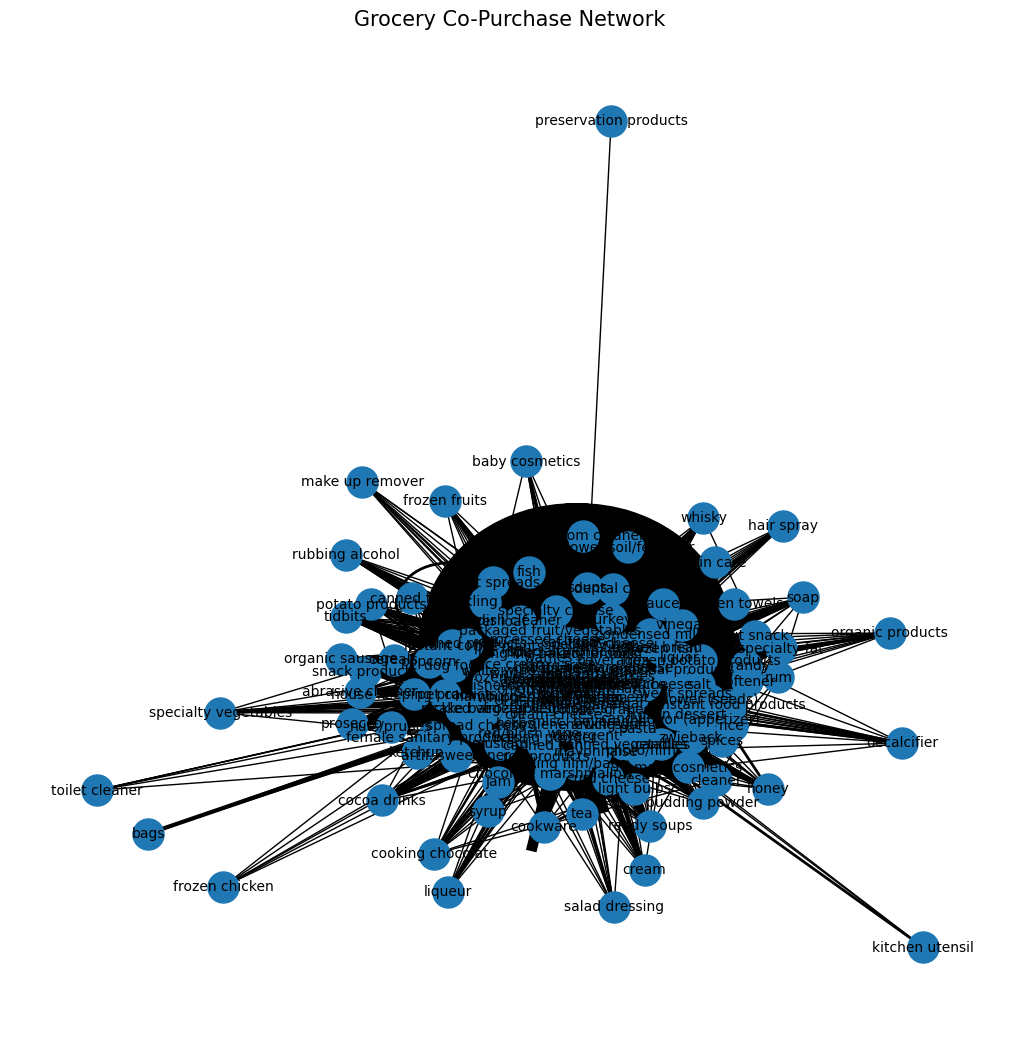

In [10]:
import pandas as pd
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/Users/rshankar/Downloads/Projects/deep-learning/ml-concepts/dataset/Groceries_dataset.csv')
# Group items by transactions (Member_number and Date)
df['Transaction'] = df['Member_number'].astype(str) + "_" + df['Date']
transactions = df.groupby('Transaction')['itemDescription'].apply(list)

# Create Graph
G = nx.Graph()

# Add edges based on co-purchases
for transaction in transactions:
    for item1, item2 in combinations(transaction, 2):
        if G.has_edge(item1, item2):
            G[item1][item2]['weight'] += 1
        else:
            G.add_edge(item1, item2, weight=1)

# Visualization
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.3)
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, pos, with_labels=True, node_size=500, font_size=10, width=weights)
plt.title("Grocery Co-Purchase Network", size=15)
plt.show()

In [11]:
def recommend(graph, item, top_n=5):
    """
    Recommends items based on co-purchase relationships.

    Parameters:
        graph (nx.Graph): The co-purchase graph.
        item (str): The item for which recommendations are required.
        top_n (int): Number of recommendations to return (default: 5).

    Returns:
        list: A list of recommended items sorted by co-purchase weight.
    """
    if item not in graph:
        return f"Item '{item}' not found in the graph."

    # Get neighbors and edge weights
    neighbors = graph[item]
    recommendations = sorted(neighbors.items(), key=lambda x: x[1]['weight'], reverse=True)

    # Extract top N recommendations
    top_recommendations = [neighbor[0] for neighbor in recommendations[:top_n]]

    return top_recommendations

# Example: Recommend items for 'whole milk'
recommended_items = recommend(G, 'whole milk', top_n=3)
print(f"Recommended items for 'whole milk': {recommended_items}")


Recommended items for 'whole milk': ['other vegetables', 'rolls/buns', 'soda']
